<b>BDS^3</b> Ukrainian Biological Data Science School

2024-06, Uzhzhorod 

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> 🦠 Курс "Аналіз мікробіому. Пошук ассоціацій з хворобами"</b> 

<i> by Kateryna Pantiukh </i> 
https://github.com/Chartiza 
</div>

**Практичний блок 4. MAG taxonomic annotation**

<b>NCBI</b> - база данних яка містить данні видів бактерій та іх ncbi таксономію. Ця база даних була першою та містила дані щодо міроорганізмів коли основною загальною практикою дослідження було культивування мкроорганізмів в лабораторії та визначення їхньої таксономії в залежності від морфологічних ознак (форма клітини, розмір) та фізфологічних данних (які речовии клітини споживають та виділяють). Основною проблемою було те, що більшість бактерій було неможливо виростити в штучному середовищі. Тому кількість видів відомих науці була дуже обмежена. Фокус був на патогених мікроорганізмах. 

<b>GTDB</b> - база даних, що включае в себе всі геноми бактерій та архей відомі на сьогодні. Все геноми організовані в кластери які представляють окремий вид. Належність до одного й самого виду визначається на основі індекса ANI. Необхідність в новій класификаціі зявилася з появою нового методу дослідження мікроорганізмів, а саме збірки геномів з метагеномних даних. В результаті цього відходу було виявлено тисячі нових видів бактерій та архей. Але морфологічні та біохімічні дані для них були недоступні тому що ці бактерії ніколи не були вирощені в лабораторії. Саме тому нова класифікація в своїй основі має порівняння геномів і тільки геномів.

<b>ANI індекс</b> - індекс схожості перекриваючихся послідовностей 2 геномів.
- якщо ANI index >= 95 два генома відносять до одного виду
- [якщо ANI index >= 99 два генома відносять до одного штаму, але це не точно]

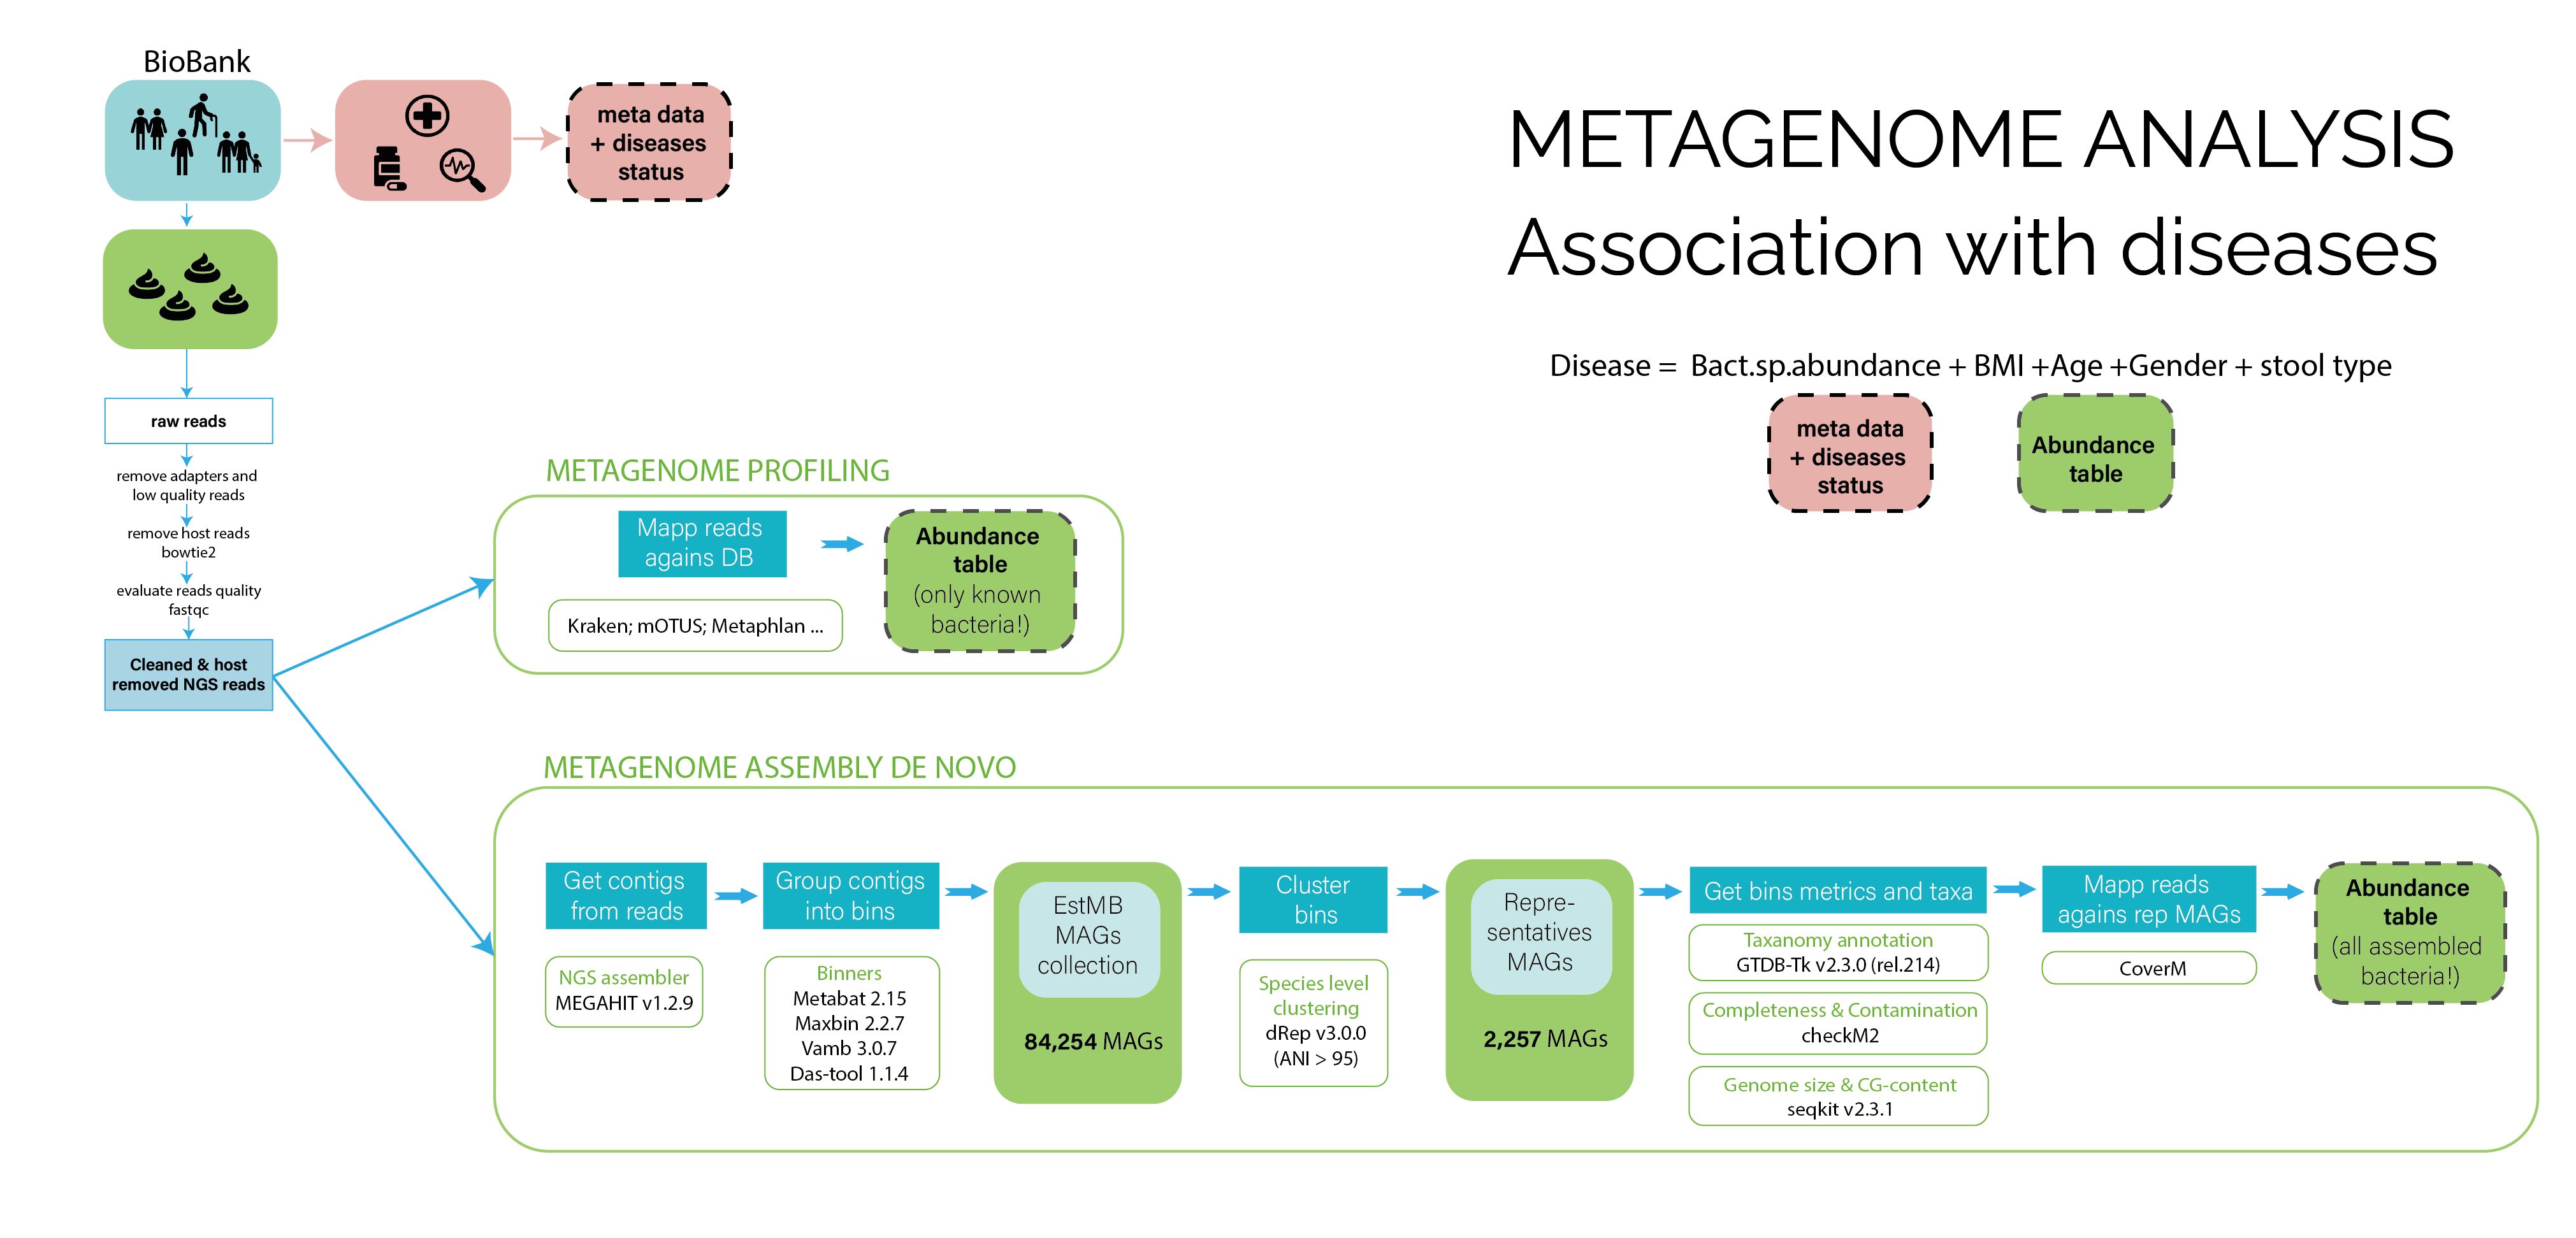

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> PACKAGES </b> </div>


- Перед початком роботи треба "включити" пакети, які ми будемо використовувати. 
- Якщо це перший раз використання, спочатку требя їх встановити на компьютер за допомогою команді **% pip install package-name**, як наприклад:

<i> % pip install pandas </i>

- Після того як пакети встановленні кожен наступни раз пакет можно зразу "підключити" за допомогою команди **import package-name**

- Для виконання команди треба буде писати назву пакету, тому для зручності ми можемо скоротити назву за допомогою команди **as short_name**, наприклад:

<i> import pandas as pd </i>


In [ ]:
#%pip install pandas

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np

## Дослідження таксономії знайдених бактерій

The classification aspect of taxonomy organizes all microorganisms into a hierarchical system consisting of groupings of specific ranks (viz. species, genus, family, order, class, and phylum) based on their shared phenotypic and genotypic characteristics.

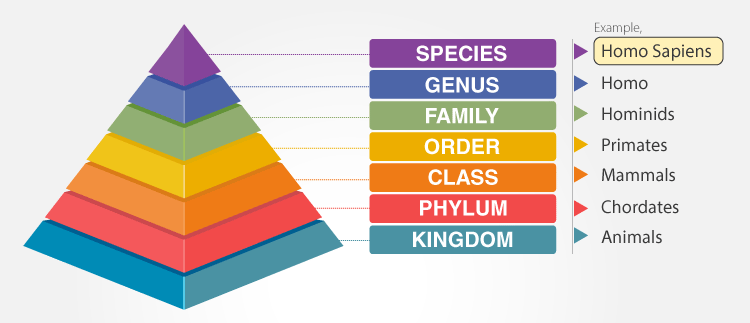

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> GTDB-tk </b> </div>

Metagenome profiling program 
[gtdb-tk] https://github.com/DerrickWood/kraken

In [2]:
# read info about all bins together
mag_taxa = pd.read_excel('input/mag_data_taxa.xlsx')
mag_taxa.head(2)

,sample_names,species,domain,phylum,class,order,family,genus,sp
0,MB-2860_metabat_26,Akkermansia muciniphila,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila
1,MB-5397_maxbin_15,Bacteroides thetaiotaomicron,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides thetaiotaomicron


In [3]:
# list of unique species
taxa = mag_taxa['species'].value_counts()
taxa = taxa.to_frame().reset_index()
taxa.rename(columns={'index': "species", 'species': "sp_count"}, inplace=True)
taxa = taxa.merge(mag_taxa, left_on='species', right_on='species', how='inner')
taxa = taxa[['domain','phylum','class','order','family','genus', 'species','sp_count']]
taxa = taxa.drop_duplicates()
taxa.head(2)

,domain,phylum,class,order,family,genus,species,sp_count
0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides ovatus,36
36,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,Parabacteroides distasonis,33


<b>Завдання:</b> 
- Проаналізуйте дані, що ми можемо сказати про різноманіття бактерій?
- Напишіть код щоб візуалізувати дані (використовуючи вже відомі вам візуалізації (piechart, barplot)

<details>
  <summary> Підказка </summary>
  
  taxa_phylum = taxa['phylum'].value_counts()
  
  taxa_phylum = taxa_phylum.to_frame().reset_index()
  
  taxa_phylum.rename(columns={'index': "phylum", 'phylum': "sp_count"}, inplace=True)

  ### Piechart
  plt.pie(taxa_phylum['sp_count'], labels=taxa_phylum['phylum'], autopct='%1.1f%%')
  
  ### Barplot
  plt.barh(taxa_phylum['phylum'], taxa_phylum['sp_count'])


</details>

# Sunburst plot
A ring chart or radial treemap, is used to visualize a hierarchical dataset.

In [5]:
import plotly.express as px

# all db taxa
fig = px.sunburst(
    taxa,
    path=['phylum','class','genus', 'species'],
    values='sp_count',
    title="Sp, \n GTDB, release214",
    color='class',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("results/taxa_Archaea.html")
fig.show()

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Microbiome composition visualisation
Focusing at one taxonomic leves and discover relative abundance of all present taxa.

In [6]:
phy_aggr = pd.read_csv('input/phylumSTAT_perc.csv')
# rename column Unnamed: 0 to sample
phy_aggr.rename(columns={'Unnamed: 0': "sample"}, inplace=True)
phy_aggr = phy_aggr.sort_values(by=['Proteobacteria'])
phy_aggr = phy_aggr.sort_values(by=['Firmicutes'])
phy_aggr = phy_aggr.sort_values(by=['Bacteroidetes'], ascending=False)
phy_aggr.head(2)


,SampleID,unclassified,Firmicutes,Actinobacteria,Bacteroidetes,Proteobacteria,Fusobacteria,Verrucomicrobia,Other
204,MB-6760,10.50,1.40,0.09,86.37,0.84,0.01,0.00,0.21
3,MB-3546,14.78,5.54,0.57,76.52,1.19,0.01,0.01,0.25


In [7]:
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [8]:
print(sns.color_palette("Set3").as_hex())

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


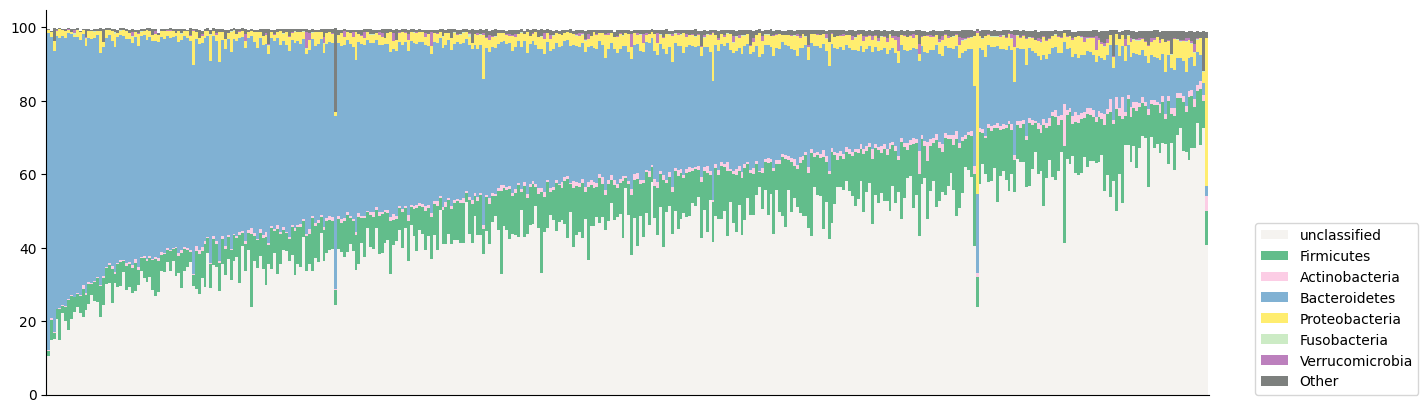

In [9]:
# Bar plot
# Define a pastel color palette
pastel_colors = ["#f5f3f0", "#62bd8b", "#fccde5", "#80b1d3", "#ffed6f", "#ccebc5", "#bc80bd", "#7d807e"]


plt = phy_aggr.plot.bar(rot=0, stacked=True, figsize=(15, 5), width=1, color=pastel_colors)
plt.legend(loc=(1.04,0))
plt.tick_params(axis='x', labelrotation=90)

plt.set_xticklabels([])
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.tick_params(bottom = False)